In [2]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import seaborn as sns

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

1. To begin, load the california dataset. Using head() function to check the first few rows of the data frame.

In [15]:
housing_data = pd.read_csv('sample_data/california_housing_train.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [16]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


2. Make pairwise scatterplots of some predictors (columns) in this dataset. Since this dataset includes many predictors, avoid using the `seaborn` `pairplot()` function with all the predictors to minimize run-time. Comment on your observations.

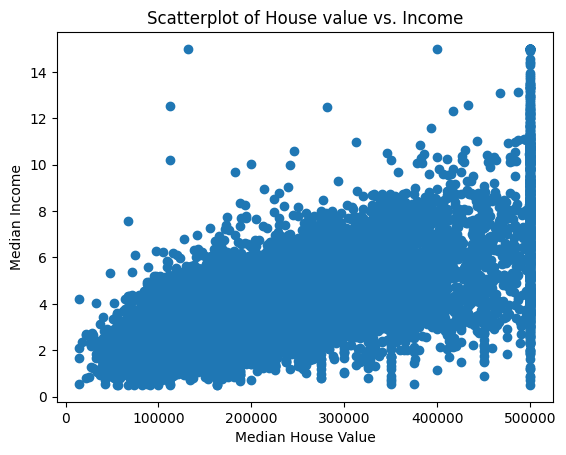

In [17]:
plt.scatter(housing_data['median_house_value'], housing_data['median_income'])
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
plt.title('Scatterplot of House value vs. Income')
plt.show()

The plot shows a positive correlation between median income and median house value; that is, higher income generally associated to higher house value.

3. Are any of the predictors associated with median house value?  If so, explain the relationship. <b>Q: Which predictor has the highest correlation with ‘median_house_value’, besides itself?<b>

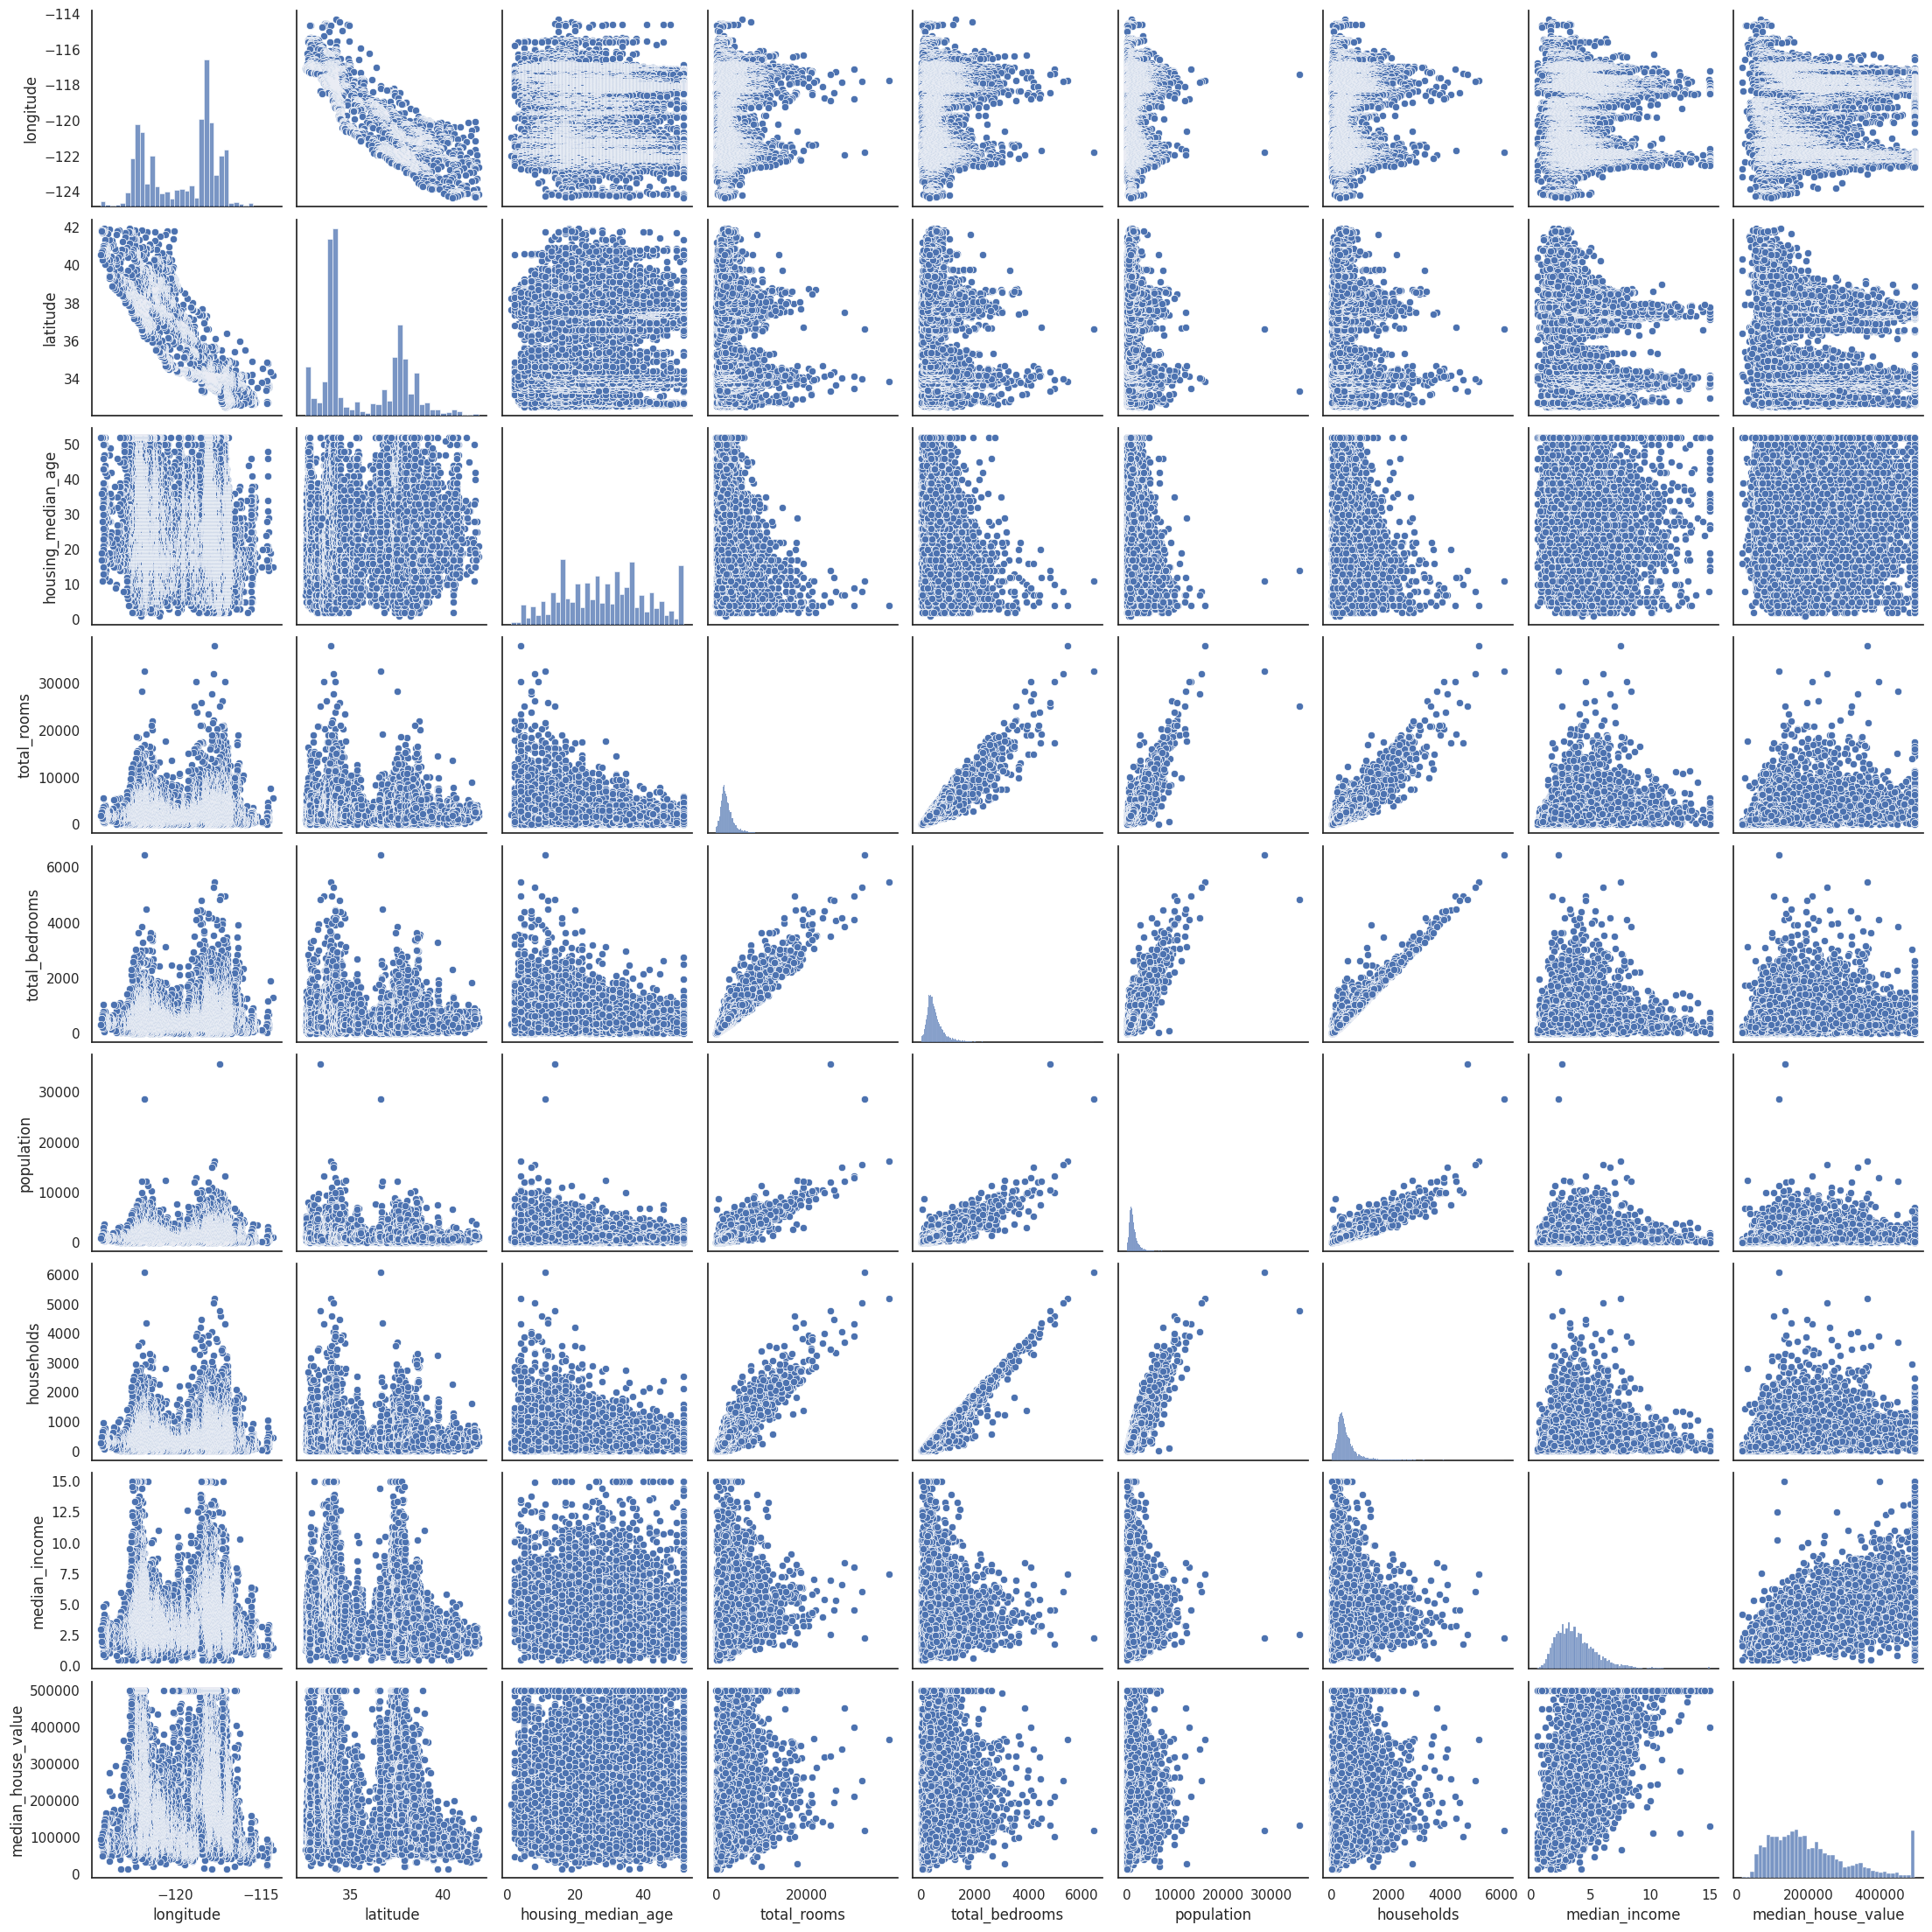

In [18]:
# Visualize the initial correlation
sns.set_theme(style="white")
# Basic correlogram
sns.pairplot(housing_data)
plt.show()

In [19]:
# Calculate correlations with median_house_value
correlations = housing_data.corr()['median_house_value'].abs()

# Remove self-correlation of median_house_value
correlations.drop('median_house_value', inplace=True)

# Find the predictor with highest correlation
highest_corr = correlations.idxmax()
highest_corr_val = correlations.max()

print(f"The predictor with the highest correlation to 'median_house_value' is '{highest_corr}'  with a correlation value of {highest_corr_val}")

The predictor with the highest correlation to 'median_house_value' is 'median_income'  with a correlation value of 0.6918706037806676


The predictor with the highest correlation to median_house_value is **median_income**  with a correlation value of **0.6918706037806676**.

4. Do any of the locations(longitude and latitude decides the location) of California appear to have particularly median income? higher population? Comment on the range of each predictor. <b>Q: Which location has the highest median house value? which location has most population?

**Location with the highest median house value**

In [20]:
max_median_house_value = housing_data['median_house_value'].max()
location_highest_median_value = housing_data[housing_data['median_house_value'] == max_median_house_value][['longitude', 'latitude']]
print("Location with the highest median house value:")
print(location_highest_median_value)

Location with the highest median house value:
       longitude  latitude
215      -116.43     33.75
260      -116.55     33.84
862      -117.08     34.08
1388     -117.17     32.69
1404     -117.18     33.51
...          ...       ...
16419    -122.56     37.94
16420    -122.56     37.92
16421    -122.56     37.91
16434    -122.57     37.96
16512    -122.64     37.96

[814 rows x 2 columns]


**Location with the highest population**

In [21]:
max_population = housing_data['population'].max()
location_highest_population = housing_data[housing_data['population'] == max_population][['longitude', 'latitude']]
print("Location with the highest population:")
print(location_highest_population)

Location with the highest population:
      longitude  latitude
2274    -117.42     33.35


5. Calculate the average population for all locations. Count the number of locations in this dataset that have population more than averge.

**Calculating average population**

In [22]:
average_population = housing_data['population'].mean()
print(f"Average population: {average_population}")

Average population: 1429.5739411764705


The average population is 1429.57.

**Count the number of town with higher population than the average**

In [23]:
locations_above_average = housing_data[housing_data['population'] > average_population]
town_count = len(locations_above_average)
print("There are %s locations have more than average population." % (town_count))

There are 6138 locations have more than average population.


There are **6138** locations/towns that have populations higher than the average population.

6. What is the median bedroom - room ratio among the towns in this dataset? Name this number as the variable `med_bedroom_ratio`.

In [24]:
med_bedroom_ratio = housing_data['total_bedrooms'] / housing_data['total_rooms']
med_bedroom_ratio = med_bedroom_ratio.median()
print("The median bedroom-to-room ratio is %s." % med_bedroom_ratio)

The median bedroom-to-room ratio is 0.20294260380396412.


The median bedroom-to-room ratio is **0.20294260380396412**.



7. Which location of California has lowest median value homes? Name this index as the variable `min_med_house_value`. If there are multiple towns with the same minimum median value, then choose the first such observation. What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your observations.

**Find the location with the lowest median value homes**

In [25]:
min_med_house_value = housing_data['median_house_value'].idxmin()
location_lowest_median_value = housing_data.loc[min_med_house_value]
location_lowest_median_value

longitude              -117.02
latitude                 36.40
housing_median_age       19.00
total_rooms             619.00
total_bedrooms          239.00
population              490.00
households              164.00
median_income             2.10
median_house_value    14999.00
Name: 568, dtype: float64

 **Retrieve the values of other predictors for that suburb**

In [27]:
other_predictors = location_lowest_median_value.drop('median_house_value')
print("Values of other predictors for that suburb with the lowest median value homes:")
print(other_predictors)


Values of other predictors for that suburb with the lowest median value homes:
longitude            -117.02
latitude               36.40
housing_median_age     19.00
total_rooms           619.00
total_bedrooms        239.00
population            490.00
households            164.00
median_income           2.10
Name: 568, dtype: float64


**Calculate the overall ranges for other predictors**

In [28]:
overall_ranges = housing_data.drop('median_house_value', axis=1).describe().loc[['min', 'max']]
print("\nOverall ranges for other predictors in the dataset:")
print(overall_ranges)



Overall ranges for other predictors in the dataset:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min    -124.35     32.54                 1.0          2.0             1.0   
max    -114.31     41.95                52.0      37937.0          6445.0   

     population  households  median_income  
min         3.0         1.0         0.4999  
max     35682.0      6082.0        15.0001  


In [39]:
Q7_comment = """
After dropping median house value field, the lowest median value homes closer to the minimum of the overall ranges.
"""
print(Q7_comment)


After dropping median house value field, the lowest median value homes closer to the minimum of the overall ranges.



8. In this data set, how many of the locations average more than eight rooms per dwelling? Name this number as the variable `num_rooms`. Comment on the suburbs that average more than eight rooms per dwelling.

**Counting the number of towns that averages more than 8 rooms per house**

In [42]:
num_rooms = housing_data[housing_data['total_rooms'] > 8]
num_rooms = len(housing_data[housing_data['total_rooms'] > 8])
print(f"The number of towns that average more than eight rooms per dwelling is: {num_rooms}")

The number of towns that average more than eight rooms per dwelling is: 16998


In [43]:
housing_data[housing_data['total_rooms'] > 8]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


**Locations where the average number of rooms per dwelling is less than eight**

In [44]:
num_locations_below_eight_rooms = housing_data[housing_data['total_rooms'] <= 8]
num_locations_below_eight_rooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0


In [46]:


Q8_comment = """
Out of 17000 houses, 16998 have more than 8 total rooms. In addition, any household with less than 8 rooms are small households.
"""
print(Q8_comment)


Out of 17000 houses, 16998 have more than 8 total rooms. In addition, any household with less than 8 rooms are small households.



9. Propose a research topic regarding this dataset, and write down the approaches you want to use to solve it(*You do NOT need to code on this one, just write down your topic and proposed methods for the topic*).

In [48]:
Q9 = """
An interesting research topic is investigating the relationship between housing median age and median income.
"""
print(Q9)


An interesting research topic is investigating the relationship between housing median age and median income.

